In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

import skimage.data as data
import skimage.segmentation as seg
from skimage import filters
from skimage import draw
from skimage import color
from skimage import exposure

In [68]:
def image_show(image, nrows=1, ncols=1, cmap='gray', **kwargs):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))
    ax.imshow(image, cmap=cmap)
    ax.axis('off')
    return fig, ax


def segment_image(img):
    h = img.shape[0]
    w = img.shape[1]
    blue, green, red = img[h//2:, :, 0], img[h//2:, :, 1], img[h//2:, :, 2]
    mask = np.zeros(red.shape)
    for x in range(mask.shape[0]):
        for y in range(mask.shape[1]):
            if red[x, y] < 35 and blue[x, y] > 30 and green[x, y] > 30:
                mask[x, y] = 1
    return mask


def is_right(mask):
    right = np.sum(mask[:, mask.shape[1]//2:])
    left = np.sum(mask[:, :mask.shape[1]//2])
    if right > left:
        return True
    return False


In [69]:
from mss import mss
with mss() as sct:
    monitor = sct.monitors[1]
    img = np.asarray(sct.grab(monitor))

True

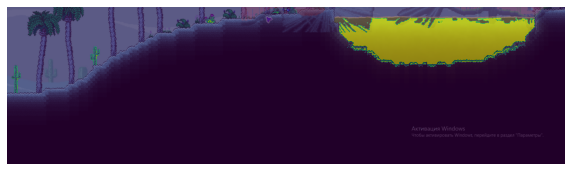

In [70]:
# img = cv2.cvtColor(cv2.imread('1.png'), cv2.COLOR_BGR2RGB)
mask = segment_image(img)
fig, ax = image_show(img[img.shape[0]//2:, :, :])
ax.imshow(mask, alpha=0.5);
is_right(mask)